In [29]:
import torch
import numpy as np
import torch.nn as nn
from IPython import display
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline

%matplotlib inline
plt.style.use('dark_background')

In [30]:
backend_inline.set_matplotlib_formats('svg')

In [31]:
epochs = 50
learning_rate = 0.05

In [32]:
N = 30
x = torch.randn(N, 1)
y = x + torch.randn(N, 1) * 0.5

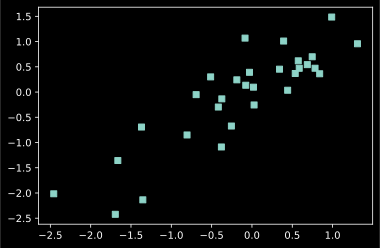

In [33]:
plt.plot(x, y, 's')
plt.show()


In [ ]:
number_of_inputs = 1
number_of_outputs = 1

# Linear Unit
input_layer = nn.Linear(number_of_inputs, number_of_outputs)

# ReLU - Rectified Linear Unit, non-linear activation function
activation_function = nn.ReLU()

# Linear Unit
output_layer = nn.Linear(number_of_inputs, number_of_outputs)

ANN = nn.Sequential(
    input_layer,
    activation_function,
    output_layer
)

ANN


In [35]:
# Mean Squared Error
loss_function = nn.MSELoss()

<img src="https://i.stack.imgur.com/Xxc9W.png" width="600"/>

In [36]:
# Stochastic Gradient Descent
optimizer = torch.optim.SGD(ANN.parameters(), lr=learning_rate)

In [37]:
losses = torch.zeros(epochs)

for i_epoch in range(epochs):
    # forward pass
    yHat = ANN(x)

    # loss, yHat = predicted values, y = observed values
    loss = loss_function(yHat, y)
    losses[i_epoch] = loss

    # backprop
    optimizer.zero_grad() # reset gradients to 0
    loss.backward() # backpropagate the loss
    optimizer.step() # update the weights


In [38]:
# final forward pass
predictions = ANN(x)

# final loss (MSE)
test_loss = (predictions - y).pow(2).mean()

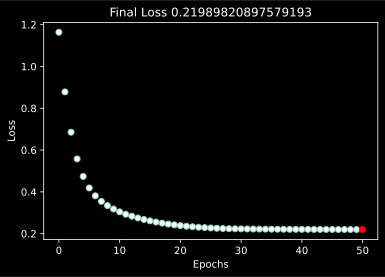

In [39]:
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.plot(epochs, test_loss.detach(), 'ro')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Final Loss {}'.format(test_loss.item()))
plt.show()


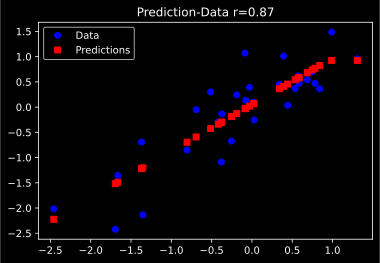

In [40]:
plt.plot(x, y, 'bo', label='Data')
plt.plot(x, predictions.detach(), 'rs', label='Predictions')
plt.title('Prediction-Data r={:.2f}'.format(np.corrcoef(y.T, predictions.detach().T)[0, 1]))
plt.legend()
plt.show()
